<a href="https://colab.research.google.com/github/manjitullal/Machine-Learning-from-scratch-code/blob/master/Manjit_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Clustering

You are given the following 8 two-dimensional points:

p1 = (2; 10); p2 = (2; 5); p3 = (8; 4); p4 = (5; 8); p5 = (7; 5); p6 = (6; 4); p7 = (1; 2); p8 = (4; 9)



## 2.1 K-means Clustering

Use the K-means algorithm and Euclidean distance to cluster the 8 points into 3 clusters.
Assume that the initial centroids are p1; p4 and p7. At the end of each iteration show:
1. The new clusters (i.e. the examples belonging to each cluster).
2. The centers of the new clusters.
3. Draw a 1010 space with all the 8 points and show the clusters and the new centroids.
How many iterations are needed for K-means to converge?

**Explaination:**

1. Kmeans is implemented directly and using sklearn package and both of them gives the same result. The cluster is displayed in the image below and the relvant centroid and the cluster labels.

2. The centroid and the labels are printed.

3. The cluster are shown below and we converge to best clusterring in 2-3 iterations for a random initial centroid.


In [38]:
import pandas as pd
import numpy as np

In [39]:
# given data 

data = [[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]]
data = np.asarray(data)

#### **Kmeans direct implementation**

In [40]:
# function to find euclidean distance between 2 points 

def euclidean_distance(p1 , p2):
  return (sum((p1 - p2)**2))**0.5

In [41]:
# assign cluster to points given centroid 

def assign_clusters(centroids, points):
  clusters_labels = []
  for i in range(points.shape[0]):
    distances = [euclidean_distance(points[i] , center) for center in centroids]
    clusters_labels.append(distances.index(min(distances)))
  return clusters_labels

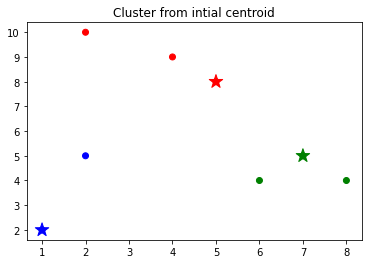

Starting labels:  [1, 2, 0, 1, 0, 0, 2, 1]
Starting centroid is:  [[7 5]
 [5 8]
 [1 2]]


In [42]:
import matplotlib.pyplot as plt

x = data[:,0]
y = data[:,1]

df = pd.DataFrame(data)
df.columns=['x','y']

# generate intial 3 centroids by choosing randomly or using the given set

import random
m = len(data)
c1, c2, c3 = random.sample(range(1,m), 3)
#c1, c2, c3 = 1, 4, 7 # given in the assignment

centroids = np.asarray([data[c1], data[c2], data[c3]])
current_labels = assign_clusters(centroids, data)

fig, ax = plt.subplots()
colormap = {0:'green', 1:'red', 2:'blue'}

# first cluster of points to given centroids

plt.scatter(x='x',y='y',c=[colormap[i] for i in current_labels],data=df)
plt.scatter(centroids[:,0], centroids[:,1], c=['green', 'red', 'blue'], marker='*', s=200)
plt.title('Cluster from intial centroid')
plt.show()

print("Starting labels: ", current_labels) 
print("Starting centroid is: ", centroids) 

In [43]:
def kmeans(data, labels, df):  
  fig , ax = plt.subplots(1, 5,figsize=(30,5)) 
  for i in range(5): # running kmeans for 5 iterations
    new_centroids = df.groupby(labels).mean().values
    new_labels = assign_clusters(new_centroids, data)
    labels = new_labels
    ax[i].scatter(x='x',y='y',c=[colormap[i] for i in labels],data=df)
    ax[i].scatter(new_centroids[:,0], new_centroids[:,1], c=['green', 'red', 'blue'], marker='*', s=200)
    ax[i].set_title(str(i+1) + ' Iteration')    

    print("Iteration " + str(i) + " labels: ", labels) 
    print("Iteration " + str(i) + " centroid is: ", new_centroids) 

Iteration 0 labels:  [1, 2, 0, 1, 0, 0, 2, 1]
Iteration 0 centroid is:  [[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]
Iteration 1 labels:  [1, 2, 0, 1, 0, 0, 2, 1]
Iteration 1 centroid is:  [[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]
Iteration 2 labels:  [1, 2, 0, 1, 0, 0, 2, 1]
Iteration 2 centroid is:  [[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]
Iteration 3 labels:  [1, 2, 0, 1, 0, 0, 2, 1]
Iteration 3 centroid is:  [[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]
Iteration 4 labels:  [1, 2, 0, 1, 0, 0, 2, 1]
Iteration 4 centroid is:  [[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]


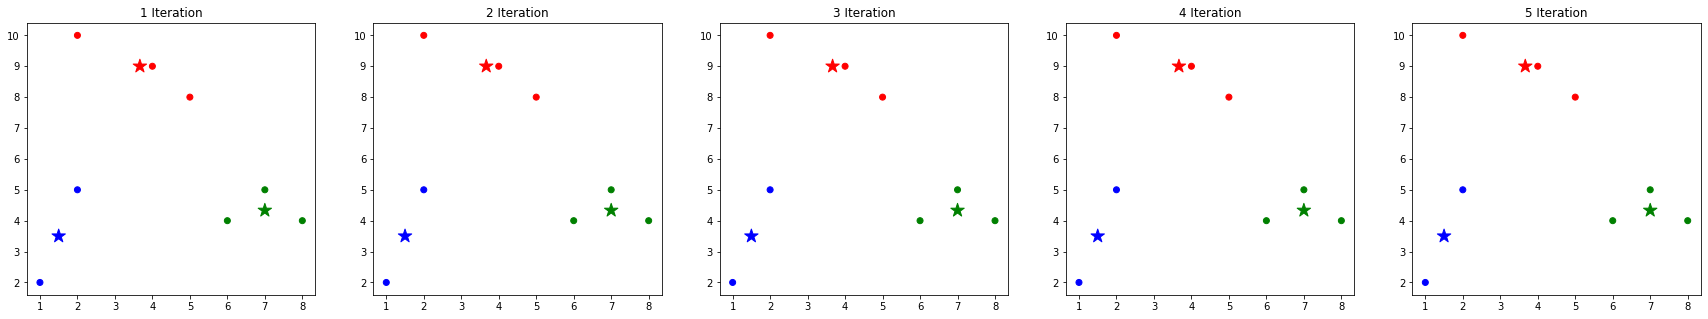

In [44]:
kmeans(data, current_labels, df)

#### **Kmeans sklearn implementation**

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

In [46]:
kmeans.labels_

array([2, 1, 0, 2, 0, 0, 1, 2], dtype=int32)

In [47]:
kmeans.cluster_centers_

array([[7.        , 4.33333333],
       [1.5       , 3.5       ],
       [3.66666667, 9.        ]])

## 2.2 Hierarchical Clustering

Use single-link, complete-link and average-link agglomerative clustering, and Euclidean distance, to cluster the same 8 points. Show the dendograms.

**Explaination:**



In [48]:
from scipy.cluster import hierarchy

h1 = hierarchy.linkage(data, method = 'single', metric='euclidean')
h1

array([[ 3.        ,  7.        ,  1.41421356,  2.        ],
       [ 2.        ,  4.        ,  1.41421356,  2.        ],
       [ 5.        ,  9.        ,  1.41421356,  3.        ],
       [ 0.        ,  8.        ,  2.23606798,  3.        ],
       [ 1.        ,  6.        ,  3.16227766,  2.        ],
       [10.        , 11.        ,  3.60555128,  6.        ],
       [12.        , 13.        ,  4.12310563,  8.        ]])

{'color_list': ['b', 'g', 'g', 'r', 'r', 'b', 'b'],
 'dcoord': [[0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 2.23606797749979, 2.23606797749979, 1.4142135623730951],
  [1.4142135623730951, 3.605551275463989, 3.605551275463989, 2.23606797749979],
  [3.1622776601683795,
   4.123105625617661,
   4.123105625617661,
   3.605551275463989]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [32.5, 32.5, 62.5, 62.5],
  [10.0, 10.0, 47.5, 47.5]],
 'ivl': ['1', '6', '5', '2', '4', '0', '3', '7'],
 'leaves': [1, 6, 5, 2, 4, 0, 3, 7]}

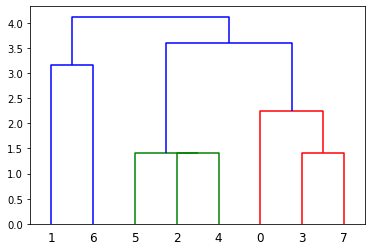

In [49]:
hierarchy.dendrogram(h1)

In [50]:
h2 = hierarchy.linkage(data, method = 'complete', metric='euclidean')
h2

array([[ 3.        ,  7.        ,  1.41421356,  2.        ],
       [ 2.        ,  4.        ,  1.41421356,  2.        ],
       [ 5.        ,  9.        ,  2.        ,  3.        ],
       [ 1.        ,  6.        ,  3.16227766,  2.        ],
       [ 0.        ,  8.        ,  3.60555128,  3.        ],
       [10.        , 11.        ,  7.28010989,  5.        ],
       [12.        , 13.        ,  8.48528137,  8.        ]])

{'color_list': ['g', 'g', 'r', 'r', 'c', 'b', 'b'],
 'dcoord': [[0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 3.605551275463989, 3.605551275463989, 1.4142135623730951],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 2.0, 2.0, 1.4142135623730951],
  [0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [2.0, 7.280109889280518, 7.280109889280518, 3.1622776601683795],
  [3.605551275463989, 8.48528137423857, 8.48528137423857, 7.280109889280518]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [42.5, 42.5, 70.0, 70.0],
  [12.5, 12.5, 56.25, 56.25]],
 'ivl': ['0', '3', '7', '5', '2', '4', '1', '6'],
 'leaves': [0, 3, 7, 5, 2, 4, 1, 6]}

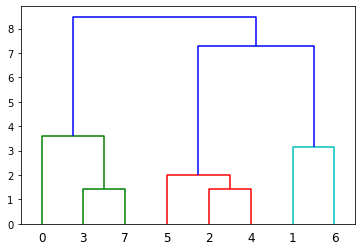

In [51]:
hierarchy.dendrogram(h2)

In [52]:
h3 = hierarchy.linkage(data, method = 'average', metric='euclidean')
h3

array([[ 3.        ,  7.        ,  1.41421356,  2.        ],
       [ 2.        ,  4.        ,  1.41421356,  2.        ],
       [ 5.        ,  9.        ,  1.70710678,  3.        ],
       [ 0.        ,  8.        ,  2.92080963,  3.        ],
       [ 1.        ,  6.        ,  3.16227766,  2.        ],
       [10.        , 12.        ,  5.76322446,  5.        ],
       [11.        , 13.        ,  5.92588718,  8.        ]])

{'color_list': ['g', 'g', 'r', 'r', 'c', 'b', 'b'],
 'dcoord': [[0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 2.9208096264818897, 2.9208096264818897, 1.4142135623730951],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 1.7071067811865475, 1.7071067811865475, 1.4142135623730951],
  [0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [1.7071067811865475,
   5.7632244641383785,
   5.7632244641383785,
   3.1622776601683795],
  [2.9208096264818897,
   5.925887181992689,
   5.925887181992689,
   5.7632244641383785]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [42.5, 42.5, 70.0, 70.0],
  [12.5, 12.5, 56.25, 56.25]],
 'ivl': ['0', '3', '7', '5', '2', '4', '1', '6'],
 'leaves': [0, 3, 7, 5, 2, 4, 1, 6]}

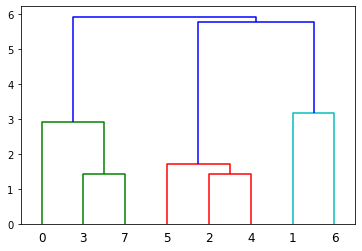

In [53]:
hierarchy.dendrogram(h3)

## 2.3 DBScan

If Eps = 2 and MinPts = 2, what are the clusters that DBScan would discover with these
8 points? Draw the 10 by 10 space and illustrate the discovered clusters. How the clusters
change if Eps is increased to
p
10?

**Explaination:**

When the EPS is increased to 10, we see only 1 cluster because the points are within a distance of 10 and fit into same cluster


In [54]:
from sklearn.cluster import DBSCAN

dbscan1 = DBSCAN(eps=2, min_samples=2)
y_dbscan1 = dbscan1.fit(data)

In [55]:
y_dbscan1.labels_

array([-1, -1,  0,  1,  0,  0, -1,  1])

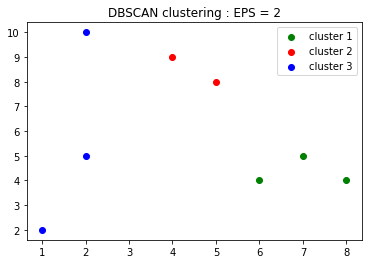

In [56]:
plt.scatter(data[y_dbscan1.labels_== 0, 0], data[y_dbscan1.labels_ == 0 , 1],
            c='green', label = 'cluster 1')
plt.scatter(data[y_dbscan1.labels_== 1, 0], data[y_dbscan1.labels_ == 1 , 1],
            c='red', label = 'cluster 2')
plt.scatter(data[y_dbscan1.labels_== -1, 0], data[y_dbscan1.labels_ == -1 , 1],
            c='blue', label = 'cluster 3')

plt.title('DBSCAN clustering : EPS = 2')
plt.legend(loc='upper right')
plt.show()

In [57]:
dbscan2 = DBSCAN(eps=10, min_samples=2)
y_dbscan2 = dbscan2.fit(data)

In [58]:
y_dbscan2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0])

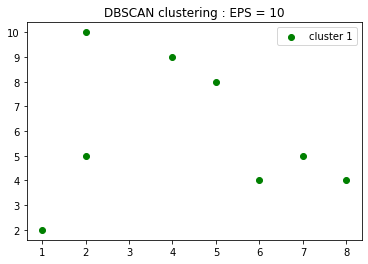

In [59]:
plt.scatter(data[y_dbscan2.labels_== 0, 0], data[y_dbscan2.labels_ == 0 , 1],
            c='green', label = 'cluster 1')
plt.title('DBSCAN clustering : EPS = 10')
plt.legend(loc='upper right')
plt.show()

# 3 Color Quantization

Color quantization finds a small number of representative colors within a given picture. Each pixel yields one 3-dimensional pattern in the RGB color space. Using K-means we can cluster all the pixels of an image into k clusters and assign each pixel the color represented by its nearest cluster center. Thereby, an image containing millions of colors can be compressed to an image containing k different colors only.

1. Load an image of your choice, treat each pixel as a 3-dimensional data point, and cluster
the pixels into k clusters. Use the methods discussed in class to find the best k.
2. Assign each pixel the color value of its nearest cluster center.
3. Visualize the result.
4. Now use mini-batch K-means for the clustering. How much gain in performance did you
get?

**Explaination:**

1. Image is loaded and reshaped into a 2D array and the kmeans clusterring is run to assign the the pixel to the closest color. The more clusters we have, we will see more colors.

2. **Elbow method** is used to find the best k value for the cluster. We can see the distortion/inertia reducing with more clusters. Starting from 15 the reduction in the distortion is not significant, so we can conclude that the optimal clusters is 15.

3. Image is displayed below using only 15 colors.

4. mini-batch kmeans produced same result as kmeans. for a small dataset the performance gain is not significant, however we do see that the model runs faster, in the example below minibatch ran *1 micro second* faster than full batch. One the other hand, mini batch has higher inertia compared to full batch.



In [60]:
from PIL import Image
from matplotlib import  image
from matplotlib import pyplot

In [61]:
#@title
# code to reduce the pixels of the image 

'''from PIL import Image

basewidth = 64
resize_img = Image.open('mysample.jpg')
wpercent = (basewidth/float(resize_img.size[0]))
hsize = int((float(resize_img.size[1])*float(wpercent)))
resize_img = resize_img.resize((basewidth,hsize), Image.ANTIALIAS)
resize_img.save('sompic.jpg')'''

"from PIL import Image\n\nbasewidth = 64\nresize_img = Image.open('mysample.jpg')\nwpercent = (basewidth/float(resize_img.size[0]))\nhsize = int((float(resize_img.size[1])*float(wpercent)))\nresize_img = resize_img.resize((basewidth,hsize), Image.ANTIALIAS)\nresize_img.save('sompic.jpg')"

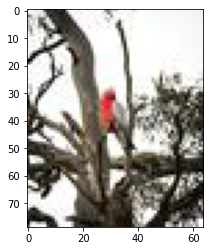

In [62]:
img_orig = image.imread("sompic.jpg")
plt.imshow(img_orig)

In [63]:
from sklearn.utils import shuffle
img = np.array(img_orig, dtype=np.float64) / 255
w, h, d = original_shape = tuple(img.shape)
image_array = np.reshape(img, (w * h, d))
image_array_sample = shuffle(image_array, random_state=0)[:1000]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs
Inertia is:  1798.6833011706792 for clusters:  1
Inertia is:  271.43990700171435 for clusters:  2
Inertia is:  124.35840173266692 for clusters:  3
Inertia is:  69.36056569565682 for clusters:  4
Inertia is:  46.70409549106989 for clusters:  5
Inertia is:  35.637955615442934 for clusters:  6
Inertia is:  28.814860701051675 for clusters:  7
Inertia is:  23.785047324096034 for clusters:  8
Inertia is:  19.052269046783536 for clusters:  9
Inertia is:  16.097359978340375 for clusters:  10
Inertia is:  13.81106041844366 for clusters:  11
Inertia is:  12.319264859368317 for clusters:  12
Inertia is:  11.11724110594977 for clusters:  13
Inertia is:  10.095738532409735 for clusters:  14
Inertia is:  9.325086056005947 for clusters:  15
Inertia is:  8.598910162645998 for clusters:  16
Inertia is:  7.9014126795407895 for clusters:  17
Inertia is:  7.455000916824561 for clusters:  18
Inertia is:  6.97091149915899 for clusters:  19


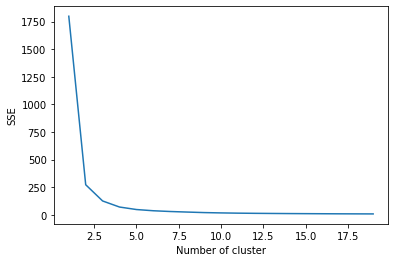

In [70]:
%time
sse = {}

for k in range(1, 20):
    kmeans_img = KMeans(n_clusters=k, max_iter=100).fit(image_array)
    sse[k] = kmeans_img.inertia_
    print("Inertia is: ", kmeans_img.inertia_, "for clusters: ", k)

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [85]:
%time
kmeans_final = KMeans(n_clusters=15, random_state=0, max_iter=100).fit(image_array_sample)
labels = kmeans_final.predict(image_array)
print(kmeans_final.inertia_)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs
1.9075027685616281


In [75]:
def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

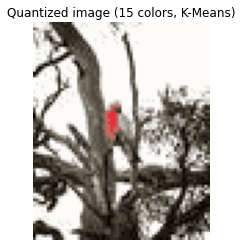

In [77]:
plt.figure()
plt.clf()
plt.axis('off')
plt.title('Quantized image (15 colors, K-Means)')
plt.imshow(recreate_image(kmeans_final.cluster_centers_, labels, w, h))

In [87]:
%time
from sklearn.cluster import MiniBatchKMeans
kmeans_minibatch = MiniBatchKMeans(n_clusters=15, random_state=0, max_iter=100).fit(image_array_sample)
labels_mini = kmeans_minibatch.predict(image_array)
print(kmeans_minibatch.inertia_)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
2.129584381981422


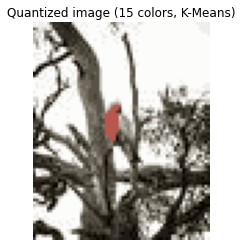

In [83]:
plt.figure()
plt.clf()
plt.axis('off')
plt.title('Quantized image (15 colors, K-Means)')
plt.imshow(recreate_image(kmeans_minibatch.cluster_centers_, labels_mini, w, h))